In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.ndimage import gaussian_filter
from matplotlib import pyplot as plt

In [12]:
'''Variables'''
sigma = 5

In [2]:
'''cell only for reading time labels'''
from toolbox.methods import read_data
all_epochs, all_rawdata = read_data(amount_of_subjects=1,task='main',resample=True,resample_frequency=50)
time_labels = all_epochs[0].times
print(time_labels.shape)

Frequency before: 500.0
Frequency after: 50.0
(288,)


In [1]:
# list of dataframes
import math
display_count = 20
stride = math.ceil(len(time_labels) / display_count)
df_resp_list = []
for i in range(1):
    df_resp_list.append(pd.DataFrame(columns=range(26)))
    resp_50hz = np.load('results_deci_rf/timepoint_decision_{}.npy'.format(i), allow_pickle=True)
    for j in range(26):
        df_resp_list[i][j] = resp_50hz[j]
    df_resp_list[i]['mean'] = df_resp_list[i].mean(axis=1) 
    df_resp_list[i]['mean_filtered'] = gaussian_filter(df_resp_list[i]['mean'], sigma=sigma)
    plt.plot(df_resp_list[i]['mean_filtered'], color = 'red')

df_resp_shuffled_list = []
for i in range(30):
    df_resp_shuffled_list.append(pd.DataFrame(columns=range(26)))
    resp_50hz = np.load('results_deci_rf/timepoint_decision_shuffled_{}.npy'.format(i), allow_pickle=True)
    for j in range(26):
        df_resp_shuffled_list[i][j] = resp_50hz[j]
    df_resp_shuffled_list[i]['mean'] = df_resp_shuffled_list[i].mean(axis=1) 
    df_resp_shuffled_list[i]['mean_filtered'] = gaussian_filter(df_resp_shuffled_list[i]['mean'], sigma=sigma)
    plt.plot(df_resp_shuffled_list[i]['mean_filtered'], color = 'blue')

x_ticks = np.arange(0, len(time_labels), 28)
x_labels = ['{:.1f}'.format(time_labels[i]) for i in x_ticks]
plt.xticks(x_ticks, x_labels)
plt.xlabel('Time')
plt.ylabel('Accuracy')
plt.show()

NameError: name 'time_labels' is not defined

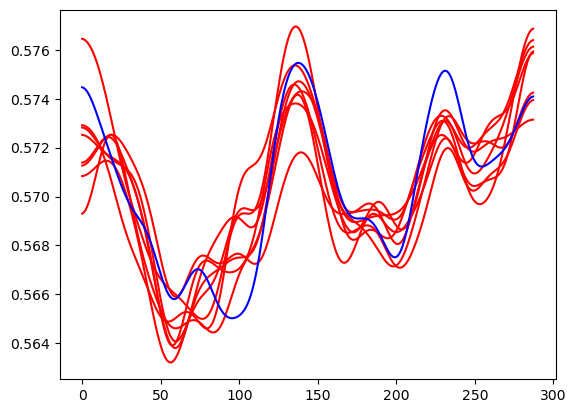

In [5]:
df_resp_list = []
for i in range(8):
    df_resp_list.append(pd.DataFrame(columns=range(26)))
    resp_50hz = np.load('results_deci_rf/timepoint_decision_{}.npy'.format(i), allow_pickle=True)
    for j in range(26):
        df_resp_list[i][j] = resp_50hz[j]
    df_resp_list[i]['mean'] = df_resp_list[i].mean(axis=1) 
    df_resp_list[i]['mean_filtered'] = gaussian_filter(df_resp_list[i]['mean'], sigma=sigma)
    plt.plot(df_resp_list[i]['mean_filtered'], color = 'red')

resp_50hz = np.load('results_deci_rf/timepoint_decision_weightless_0.npy', allow_pickle=True)
df_deci_weightless = pd.DataFrame(columns=range(26))
for j in range (26):
    df_deci_weightless[j] = resp_50hz[j]

df_deci_weightless['mean'] = df_deci_weightless.mean(axis=1)
df_deci_weightless['mean_filtered'] = gaussian_filter(df_deci_weightless['mean'], sigma=sigma)
plt.plot(df_deci_weightless['mean_filtered'], color = 'blue')

In [7]:
load = np.load('results_deci_rf/timepoint_decision_weightless_0.npy', allow_pickle=True)
print(type(load), len(load))
df = pd.DataFrame(columns=range(26))
for i in range(26):
    df[i] = load[i]

<class 'numpy.ndarray'> 27


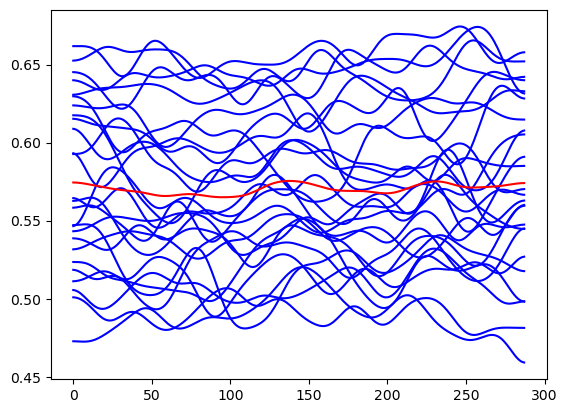

In [8]:
df['mean'] = df.mean(axis=1)
df['mean_filtered'] = gaussian_filter(df['mean'], sigma=sigma)
for columns in range (26):
    df['filtered_'+str(columns)] = gaussian_filter(df[columns], sigma=sigma)
    plt.plot(df['filtered_'+str(columns)], color = 'blue')
plt.plot(df['mean_filtered'], color = 'red')


<class 'numpy.ndarray'> 27


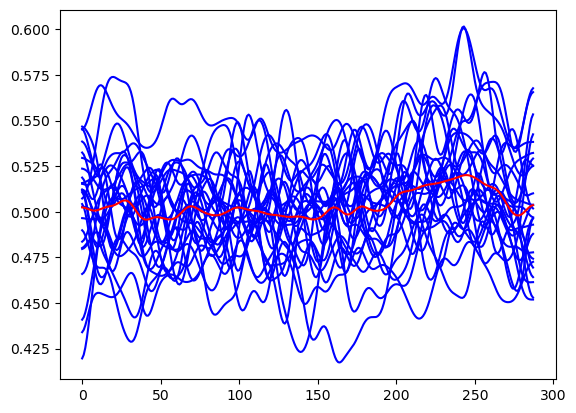

In [17]:
load = np.load('results_resp_rf/timepoint_response_weightless_0.npy', allow_pickle=True)
print(type(load), len(load))
df = pd.DataFrame(columns=range(26))
for i in range(26):
    df[i] = load[i]
df['mean'] = df.mean(axis=1)
df['mean_filtered'] = gaussian_filter(df['mean'], sigma=sigma)
for columns in range (26):
    df['filtered_'+str(columns)] = gaussian_filter(df[columns], sigma=sigma)
    plt.plot(df['filtered_'+str(columns)], color = 'blue')
plt.plot(df['mean_filtered'], color = 'red')


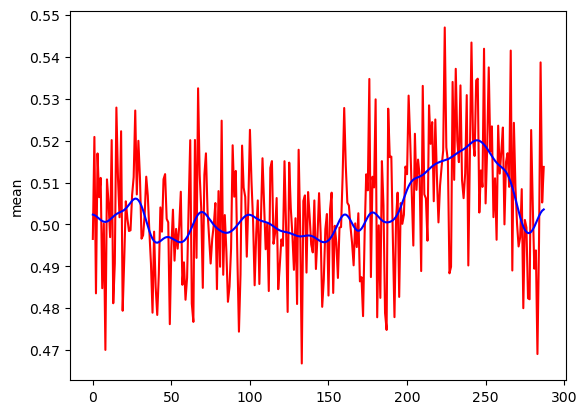

In [31]:
sns.lineplot(data=df, 
             x=df.index, 
             y='mean',
             # err_style="bars", 
             errorbar=('ci',95), 
             color='red')
sns.lineplot(data=df,
            x=df.index,
            y='mean_filtered',
            errorbar=('ci',95),
            color='blue')

plt.show()

In [23]:
plt.show()

In [16]:
# for columns in range (26):
#     df_resp_list[0]['filtered'+str(columns)] = gaussian_filter(df_resp_list[0][columns], sigma=sigma)
# for i in range(26):
#     plt.plot(df_resp_list[0]['filtered'+str(i)], color = 'blue')
# plt.plot(df_resp_list[0]['mean_filtered'], color = 'red')
# plt.legend()